# WeatherPy
- The highest max temperatures for September 14, 2017 were near the Tropic of Cancer.
- The northern hemisphere had a larger range of temperatures than the southern hemisphere at this time. The lowest temperatures in the northern hemisphere were about 20 degrees Fahrenheit colder than the lowest temperatures in the southern hemisphere.
- At approximately 10am EST on September 14, 2017, the humidity was generally higher at the equator than at other lattitudes. The Tropics of Cancer and Capricorn had the highest variability in humidity at this time. Humidity at this time was highest in coastal regions.
- High winds are visible on the final figure - global wind speed by latitude and logitude - near the notoriously windy sailing route around Cape Horn.

In [2]:
# import dedendencies
import random
from citipy import citipy 
import pandas as pd
import numpy as np
import time
import requests
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# get random latitude and longitude
# increase sample count closer to the equater than the poles; equal count between east and west hemispheres 

coords = []
x = -90
y = -81
latCount = 15
rev = False

while x < y and y <90:
    for _ in range(latCount):
        lat = random.randrange(x,y)
        lng = random.randrange(-180,0)
        coords.append((lat,lng)) # adding as tuple
    for _ in range(latCount):
        lat = random.randrange(x,y)
        lng = random.randrange(0,181)
        coords.append((lat,lng)) # adding as tuple
    x= x + 10
    y = y + 10
    if latCount == 31:
        rev=True
    if rev:
        latCount -= 3
    else:
        latCount += 3
print(coords)
        

[(-83, -8), (-89, -116), (-90, -98), (-86, -160), (-89, -120), (-90, -115), (-90, -95), (-88, -94), (-83, -156), (-89, -61), (-82, -86), (-85, -21), (-87, -90), (-89, -139), (-85, -44), (-82, 147), (-84, 160), (-82, 141), (-86, 164), (-82, 180), (-88, 43), (-88, 44), (-89, 170), (-87, 46), (-90, 57), (-85, 123), (-84, 91), (-90, 113), (-89, 14), (-85, 89), (-73, -70), (-73, -86), (-80, -96), (-80, -44), (-79, -23), (-79, -117), (-74, -174), (-77, -167), (-72, -2), (-74, -41), (-80, -59), (-75, -155), (-79, -112), (-75, -127), (-75, -9), (-80, -145), (-74, -73), (-80, -101), (-79, 125), (-73, 108), (-75, 66), (-75, 139), (-78, 144), (-76, 84), (-75, 63), (-73, 88), (-80, 175), (-75, 60), (-77, 86), (-77, 30), (-78, 81), (-75, 141), (-78, 19), (-79, 147), (-73, 44), (-76, 75), (-64, -48), (-62, -153), (-66, -51), (-68, -55), (-68, -163), (-70, -87), (-69, -57), (-65, -95), (-69, -132), (-70, -91), (-64, -5), (-67, -66), (-64, -43), (-64, -109), (-67, -112), (-62, -150), (-64, -106), (-64

In [4]:
len(coords)

1458

In [5]:
# check that the list is unique
uniqueCoords = set(coords)
len(uniqueCoords)

1442

In [6]:
# get the cities nearest these coordinates
cities = []
for coordinate_pair in uniqueCoords:
    lat, lon = coordinate_pair # tuple allows natural split
    cities.append(citipy.nearest_city(lat, lon))
    print(citipy.nearest_city(lat, lon).city_name + ", " +  citipy.nearest_city(lat,lon).country_code)

puerto escondido, mx
pitimbu, br
thompson, ca
narsaq, gl
byron bay, au
hamilton, bm
katsiveli, ua
ushuaia, ar
illoqqortoormiut, gl
port hedland, au
puerto ayora, ec
mahebourg, mu
kapaa, us
tuktoyaktuk, ca
bafoulabe, ml
avarua, ck
antofagasta, cl
kalmunai, lk
bairiki, ki
hilo, us
aklavik, ca
saskylakh, ru
yellowknife, ca
springbok, za
hilo, us
rikitea, pf
listvyanka, ru
dingle, ie
barentsburg, sj
punta arenas, cl
coahuayana, mx
halifax, ca
angoche, mz
karaul, ru
tasiilaq, gl
victoria, sc
santiago del estero, ar
hithadhoo, mv
saint george, bm
dubti, et
hobart, au
york, gb
rikitea, pf
dhidhdhoo, mv
orotukan, ru
victoria, sc
mujiayingzi, cn
mataura, pf
upernavik, gl
richards bay, za
mehamn, no
mugumu, tz
guerrero negro, mx
tiksi, ru
qaanaaq, gl
nipawin, ca
bonavista, ca
aklavik, ca
rikitea, pf
henties bay, na
rocha, uy
kawhia, nz
illoqqortoormiut, gl
codrington, ag
chokurdakh, ru
illoqqortoormiut, gl
christchurch, nz
marzuq, ly
solnechnyy, ru
kapaa, us
pangnirtung, ca
erdenet, mn
saint geo

In [8]:
# ensure we have at least 500 cities
uniqueCities = set(cities)
len(uniqueCities)

668

In [9]:
# create a df using list comprehensions
df = pd.DataFrame({'city_name': [c.city_name for c in uniqueCities], 'country_code': [c.country_code for c in uniqueCities]})
df.head()

,city_name,country_code
0,cap malheureux,mu
1,myaundzha,ru
2,erdenet,mn
3,maceio,br
4,viganello,ch


In [10]:
# add the columns we will obtain
df["latitude"] = ""
df["longitude"] = ""
df["maxtemp"] = ""
df["humidity"] = ""
df["clouds"] = ""
df["wind"] = ""
df.head()

,city_name,country_code,latitude,longitude,maxtemp,humidity,clouds,wind
0,cap malheureux,mu,,,,,,
1,myaundzha,ru,,,,,,
2,erdenet,mn,,,,,,
3,maceio,br,,,,,,
4,viganello,ch,,,,,,


In [16]:
# start with single record to ensure it works, then increase # of records, then test just over 1 set, (using wait)
test = 0
recordCount = 1
maxCalls = 50 # max 60 calls per minute
setCount = 1

api_key="fa175c2789ea78e45896267c2a85aa5c"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # for Fahrenheit 

queryUrl = url + "appid=" + api_key + "&units=" + units + "&q="


print("Beginning API calls...")

for index, row in df.iterrows():
    if recordCount == maxCalls:
        print("-----------------------------------------------------------")
        print("sleep called for 60 seconds...")
        time.sleep(60) # wait a minute to call next set of records to be called
        setCount += 1
#         reset recordCount
        recordCount = 1
    if setCount == test:
        break
    else:
    #     get the weather for this city
        print("Call " + str(recordCount) + " of set " + str(setCount) + " - " + row["city_name"] + ", " + row["country_code"])
        print(queryUrl+row["city_name"]+","+row["country_code"])
        try:
            response = requests.get(queryUrl+row["city_name"]+","+row["country_code"]).json()
        except:
            print(row["city_name"]+", "+row["country_code"]+ " not found in openweatherAPI")
        try:
            df.set_value(index, "maxtemp", response["main"]["temp_max"])    
            df.set_value(index, "humidity", response["main"]["humidity"])
            df.set_value(index, "clouds", response["clouds"]["all"])
            df.set_value(index, "wind", response["wind"]["speed"])
            df.set_value(index, "latitude", response["coord"]["lat"])
            df.set_value(index, "longitude", response["coord"]["lon"])
        except:
            print("missing data for " + row["city_name"]+", "+row["country_code"])
        recordCount += 1
print("-----------------------------------------------------------")        
print("Finished calling API!")
print("-----------------------------------------------------------")
df.head()

Beginning API calls...
Call 1 of set 1 - cap malheureux, mu
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=cap malheureux,mu
Call 2 of set 1 - myaundzha, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=myaundzha,ru
Call 3 of set 1 - erdenet, mn
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=erdenet,mn
Call 4 of set 1 - maceio, br
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=maceio,br
Call 5 of set 1 - viganello, ch
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=viganello,ch
Call 6 of set 1 - batemans bay, au
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=batemans bay,au
Call 7 of set 1 - hovd, mn
http://api.openweathermap.org/data/2.5/weather?appid=fa1

Call 7 of set 2 - geraldton, au
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=geraldton,au
Call 8 of set 2 - halalo, wf
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=halalo,wf
Call 9 of set 2 - bugaan, ph
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=bugaan,ph
Call 10 of set 2 - kurumkan, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kurumkan,ru
Call 11 of set 2 - kita, ml
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kita,ml
Call 12 of set 2 - chuy, uy
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=chuy,uy
Call 13 of set 2 - nanakuli, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=nanakuli

Call 14 of set 3 - progreso, mx
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=progreso,mx
Call 15 of set 3 - iralaya, hn
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=iralaya,hn
Call 16 of set 3 - hollins, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=hollins,us
Call 17 of set 3 - heerenveen, nl
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=heerenveen,nl
Call 18 of set 3 - pangkalanbuun, id
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=pangkalanbuun,id
Call 19 of set 3 - pahrump, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=pahrump,us
Call 20 of set 3 - djougou, bj
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a

Call 20 of set 4 - hvide sande, dk
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=hvide sande,dk
Call 21 of set 4 - marzuq, ly
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=marzuq,ly
Call 22 of set 4 - peace river, ca
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=peace river,ca
Call 23 of set 4 - klaksvik, fo
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=klaksvik,fo
Call 24 of set 4 - shache, cn
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=shache,cn
Call 25 of set 4 - bafra, tr
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=bafra,tr
Call 26 of set 4 - kodinsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&uni

Call 26 of set 5 - zhob, pk
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=zhob,pk
Call 27 of set 5 - douglas, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=douglas,us
Call 28 of set 5 - leningradskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=leningradskiy,ru
Call 29 of set 5 - kamennomostskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kamennomostskiy,ru
Call 30 of set 5 - tumannyy, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=tumannyy,ru
Call 31 of set 5 - kaitangata, nz
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kaitangata,nz
Call 32 of set 5 - zolotinka, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78

Call 32 of set 6 - surt, ly
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=surt,ly
Call 33 of set 6 - derzhavinsk, kz
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=derzhavinsk,kz
Call 34 of set 6 - severo-kurilsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=severo-kurilsk,ru
Call 35 of set 6 - bilibino, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=bilibino,ru
Call 36 of set 6 - attawapiskat, ca
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=attawapiskat,ca
Call 37 of set 6 - tumwater, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=tumwater,us
Call 38 of set 6 - shchelyayur, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea

Call 38 of set 7 - faya, td
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=faya,td
Call 39 of set 7 - ahuimanu, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=ahuimanu,us
Call 40 of set 7 - pemangkat, id
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=pemangkat,id
Call 41 of set 7 - tabuk, sa
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=tabuk,sa
Call 42 of set 7 - mullaitivu, lk
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=mullaitivu,lk
Call 43 of set 7 - tura, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=tura,ru
Call 44 of set 7 - raudeberg, no
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&

Call 44 of set 8 - hami, cn
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=hami,cn
Call 45 of set 8 - perevolotskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=perevolotskiy,ru
Call 46 of set 8 - titesti, ro
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=titesti,ro
Call 47 of set 8 - cherskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=cherskiy,ru
Call 48 of set 8 - kannangad, in
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kannangad,in
Call 49 of set 8 - dawlatabad, af
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=dawlatabad,af
-----------------------------------------------------------
sleep called for 60 seconds...
Call 1 of set 9 - str

Call 1 of set 10 - cabra, ph
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=cabra,ph
Call 2 of set 10 - kyren, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kyren,ru
Call 3 of set 10 - sorong, id
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=sorong,id
Call 4 of set 10 - pastavy, by
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=pastavy,by
Call 5 of set 10 - puerto baquerizo moreno, ec
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=puerto baquerizo moreno,ec
Call 6 of set 10 - karkaralinsk, kz
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=karkaralinsk,kz
Call 7 of set 10 - talwara, in
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78

Call 8 of set 11 - opole lubelskie, pl
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=opole lubelskie,pl
Call 9 of set 11 - ancud, cl
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=ancud,cl
Call 10 of set 11 - harper, lr
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=harper,lr
Call 11 of set 11 - pascagoula, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=pascagoula,us
Call 12 of set 11 - kaspiysk, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=kaspiysk,ru
Call 13 of set 11 - bud, no
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=bud,no
Call 14 of set 11 - virginia beach, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c

Call 15 of set 12 - armacao dos buzios, br
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=armacao dos buzios,br
Call 16 of set 12 - danshui, cn
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=danshui,cn
Call 17 of set 12 - la ronge, ca
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=la ronge,ca
Call 18 of set 12 - tigre, pa
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=tigre,pa
Call 19 of set 12 - houma, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=houma,us
Call 20 of set 12 - adrar, dz
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=adrar,dz
Call 21 of set 12 - khatanga, ru
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a

Call 21 of set 13 - katsiveli, ua
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=katsiveli,ua
Call 22 of set 13 - illoqqortoormiut, gl
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=illoqqortoormiut,gl
Call 23 of set 13 - cape town, za
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=cape town,za
Call 24 of set 13 - axim, gh
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=axim,gh
Call 25 of set 13 - te anau, nz
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=te anau,nz
Call 26 of set 13 - cabo san lucas, mx
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=cabo san lucas,mx
Call 27 of set 13 - bafq, ir
http://api.openweathermap.org/data/2.5/weather?appid=fa175c27

Call 28 of set 14 - qaqortoq, gl
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=qaqortoq,gl
Call 29 of set 14 - buluang, ph
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=buluang,ph
Call 30 of set 14 - qasigiannguit, gl
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=qasigiannguit,gl
Call 31 of set 14 - clovis, us
http://api.openweathermap.org/data/2.5/weather?appid=fa175c2789ea78e45896267c2a85aa5c&units=imperial&q=clovis,us
-----------------------------------------------------------
Finished calling API!
-----------------------------------------------------------


,level_0,index,city_name,country_code,latitude,longitude,maxtemp,humidity,clouds,wind
0,0,0,cap malheureux,mu,-19.98,57.61,75.2,53,20,10.29
1,1,1,myaundzha,ru,63.05,147.19,24.92,77,24,2.17
2,2,2,erdenet,mn,49.03,104.08,44.99,79,92,4.41
3,3,3,maceio,br,-9.67,-35.74,77,78,75,17.22
4,4,4,viganello,ch,46.01,8.97,68,100,90,2.24


In [41]:
# check for rows where there is no data

df[(df["maxtemp"]=="") | (df["humidity"]=="")  | (df["clouds"]=="")| (df["wind"]=="")]


,city_name,country_code,latitude,longitude,maxtemp,humidity,clouds,wind


In [40]:
# df=df.drop(df.index[83]) # falealupo, ws
# df=df.drop(df.index[312]) # barentsburg, sj

In [35]:
# check the index 
df.iloc[312]

level_0                315
index                  315
city_name       coahuayana
country_code            mx
latitude             18.73
longitude          -103.68
maxtemp               79.1
humidity               100
clouds                  80
wind                  2.17
Name: 315, dtype: object

In [36]:
# save the data to csv
csvPath = os.path.join("output","WeatherPyCopy.csv")
df.to_csv(csvPath)

In [39]:
# delete the extra columns that were created when reindexing
del df["index"]

### Temperature versus Latitude

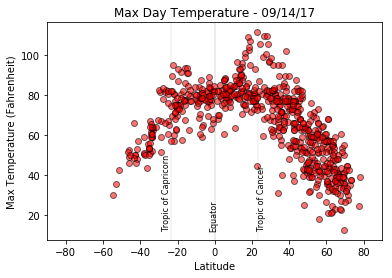

In [42]:
plt.scatter(df["latitude"], df["maxtemp"], marker="o", facecolors="red", edgecolors="black",  alpha=0.55)
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.axvline(0, c="k", alpha=.1)
plt.axvline(23.5, c="k", alpha=.05)
plt.axvline(-23.5, c="k", alpha=.05)
plt.title("Max Day Temperature - 09/14/17")
plt.gcf().text(.50, .24, "Equator", fontsize=8, rotation="vertical")
plt.gcf().text(.39, .40, "Tropic of Capricorn", fontsize=8, rotation="vertical")
plt.gcf().text(.61, .36, "Tropic of Cancer", fontsize=8, rotation="vertical")
plt.show()

### Temperature plotted against latitiude and longitude

In [43]:
# df["tempColor"] = df["maxtemp"].astype(int)
df['tempColor'] = ""
df.loc[df['maxtemp'] > 10, 'tempColor'] = "xkcd:violet"
df.loc[df['maxtemp'] > 20, 'tempColor'] = "xkcd:indigo blue"
df.loc[df['maxtemp'] > 30, 'tempColor'] = "xkcd:blue"
df.loc[df['maxtemp'] > 40, 'tempColor'] = "xkcd:green"
df.loc[df['maxtemp'] > 50, 'tempColor'] = "xkcd:sea green"
df.loc[df['maxtemp'] > 60, 'tempColor'] = "xkcd:yellow green"
df.loc[df['maxtemp'] > 70, 'tempColor'] = "xkcd:yellow"
df.loc[df['maxtemp'] > 80, 'tempColor'] = "xkcd:orange"
df.loc[df['maxtemp'] > 90, 'tempColor'] = "xkcd:reddish orange"
df.loc[df['maxtemp'] > 100, 'tempColor'] = "xkcd:red"

df.head()

,city_name,country_code,latitude,longitude,maxtemp,humidity,clouds,wind,tempColor
0,cap malheureux,mu,-19.98,57.61,75.2,53,20,10.29,xkcd:yellow
1,myaundzha,ru,63.05,147.19,24.92,77,24,2.17,xkcd:indigo blue
2,erdenet,mn,49.03,104.08,44.99,79,92,4.41,xkcd:green
3,maceio,br,-9.67,-35.74,77,78,75,17.22,xkcd:yellow
4,viganello,ch,46.01,8.97,68,100,90,2.24,xkcd:yellow green


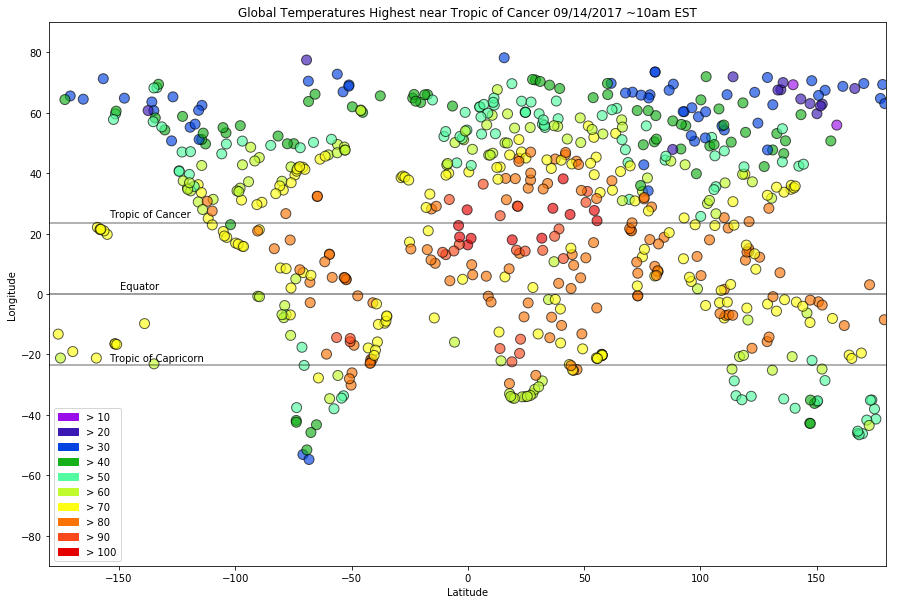

In [45]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df["longitude"], df["latitude"], color=df["tempColor"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title("Global Temperatures Highest near Tropic of Cancer 09/14/2017 ~10am EST")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

tempgreaterthan10 = mpatches.Patch(color='xkcd:violet', label='> 10')
tempgreaterthan20 = mpatches.Patch(color='xkcd:indigo blue', label='> 20')
tempgreaterthan30 = mpatches.Patch(color='xkcd:blue', label='> 30')
tempgreaterthan40 = mpatches.Patch(color='xkcd:green', label='> 40')
tempgreaterthan50 = mpatches.Patch(color='xkcd:sea green', label='> 50')
tempgreaterthan60 = mpatches.Patch(color='xkcd:yellow green', label='> 60')
tempgreaterthan70 = mpatches.Patch(color='xkcd:yellow', label='> 70')
tempgreaterthan80 = mpatches.Patch(color='xkcd:orange', label='> 80')
tempgreaterthan90 = mpatches.Patch(color='xkcd:reddish orange', label='> 90')
tempgreaterthan100 = mpatches.Patch(color='xkcd:red', label='> 100')

plt.legend(handles=[tempgreaterthan10, tempgreaterthan20, tempgreaterthan30, tempgreaterthan40, tempgreaterthan50, tempgreaterthan60, tempgreaterthan70, tempgreaterthan80, tempgreaterthan90, tempgreaterthan100], frameon=True, loc="lower left")
plt.gcf().text(.19,.51,"Equator", fontsize=10)
plt.gcf().text(.18,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.18,.41,"Tropic of Capricorn", fontsize=10)
plt.show()

### Humidity versus Latitude

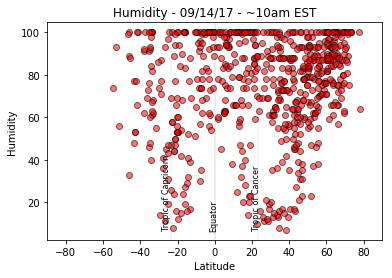

In [46]:
plt.scatter(df["latitude"], df["humidity"], marker="o", facecolors="red", edgecolors="black",  alpha=0.55)
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.axvline(0, c="k", alpha=.1)
plt.axvline(23.5, c="k", alpha=.05)
plt.axvline(-23.5, c="k", alpha=.05)
plt.gcf().text(.50, .24, "Equator", fontsize=8, rotation="vertical")
plt.gcf().text(.39, .40, "Tropic of Capricorn", fontsize=8, rotation="vertical")
plt.gcf().text(.60, .36, "Tropic of Cancer", fontsize=8, rotation="vertical")
plt.title("Humidity - 09/14/17 - ~10am EST")
plt.show()

### Humidity plotted against latitude and longitude

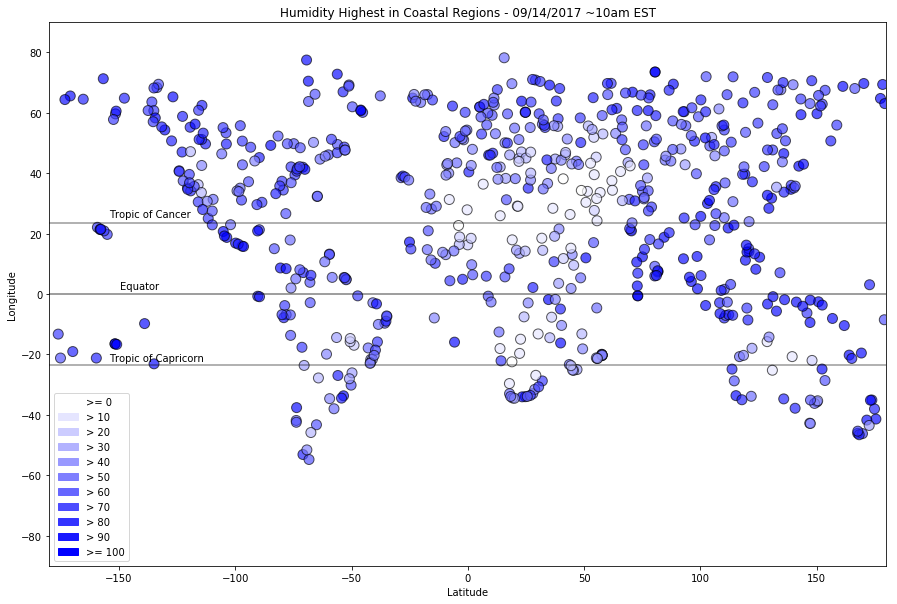

In [47]:
df['humidityColor'] = ""
df.loc[df['humidity'] >=0, 'humidityColor'] = "#FFFFFF"
df.loc[df['humidity'] > 10, 'humidityColor'] = "#E5E5FF"
df.loc[df['humidity'] > 20, 'humidityColor'] = "#CCCCFF"
df.loc[df['humidity'] > 30, 'humidityColor'] = "#B2B2FF"
df.loc[df['humidity'] > 40, 'humidityColor'] = "#9999FF"
df.loc[df['humidity'] > 50, 'humidityColor'] = "#7F7FFF"
df.loc[df['humidity'] > 60, 'humidityColor'] = "#6666FF"
df.loc[df['humidity'] > 70, 'humidityColor'] = "#4C4CFF"
df.loc[df['humidity'] > 80, 'humidityColor'] = "#3333FF"
df.loc[df['humidity'] > 90, 'humidityColor'] = "#1919FF"
df.loc[df['humidity'] >= 100, 'humidityColor'] = "#0000FF"


df.head()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df["longitude"], df["latitude"], color=df["humidityColor"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title("Humidity Highest in Coastal Regions - 09/14/2017 ~10am EST")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.gcf().text(.19,.51,"Equator", fontsize=10)
plt.gcf().text(.18,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.18,.41,"Tropic of Capricorn", fontsize=10)

humiditygreaterthan0 = mpatches.Patch(color='#FFFFFF', label='>= 0')
humiditygreaterthan10 = mpatches.Patch(color='#E5E5FF', label='> 10')
humiditygreaterthan20 = mpatches.Patch(color='#CCCCFF', label='> 20')
humiditygreaterthan30 = mpatches.Patch(color='#B2B2FF', label='> 30')
humiditygreaterthan40 = mpatches.Patch(color='#9999FF', label='> 40')
humiditygreaterthan50 = mpatches.Patch(color='#7F7FFF', label='> 50')
humiditygreaterthan60 = mpatches.Patch(color='#6666FF', label='> 60')
humiditygreaterthan70 = mpatches.Patch(color='#4C4CFF', label='> 70')
humiditygreaterthan80 = mpatches.Patch(color='#3333FF', label='> 80')
humiditygreaterthan90 = mpatches.Patch(color='#1919FF', label='> 90')
humiditygreaterthan100 = mpatches.Patch(color='#0000FF', label='>= 100')

plt.legend(handles=[humiditygreaterthan0, humiditygreaterthan10, humiditygreaterthan20, humiditygreaterthan30, humiditygreaterthan40, humiditygreaterthan50, humiditygreaterthan60, humiditygreaterthan70, humiditygreaterthan80, humiditygreaterthan90, humiditygreaterthan100], frameon=True, loc="lower left")


plt.show()

### Cloudiness versus Latitude

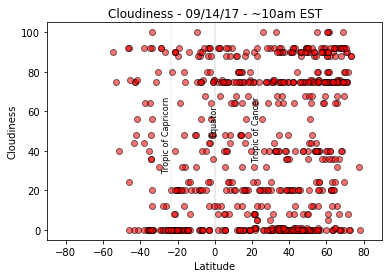

In [48]:
plt.scatter(df["latitude"], df["clouds"], marker="o", facecolors="red", edgecolors="black",  alpha=0.55)
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.axvline(0, c="k", alpha=.1)
plt.axvline(23.5, c="k", alpha=.05)
plt.axvline(-23.5, c="k", alpha=.05)
plt.title("Cloudiness - 09/14/17 - ~10am EST")
plt.gcf().text(.50, .57, "Equator", fontsize=8, rotation="vertical")
plt.gcf().text(.39, .6, "Tropic of Capricorn", fontsize=8, rotation="vertical")
plt.gcf().text(.60, .6, "Tropic of Cancer", fontsize=8, rotation="vertical")
plt.show()

### Cloudiness plotted against latitude and longitude

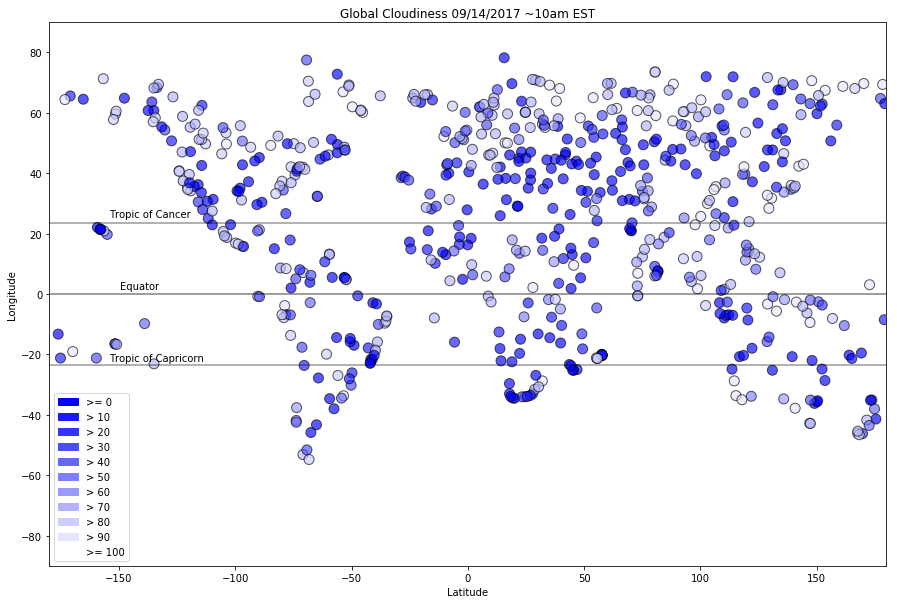

In [49]:
df['cloudColor'] = ""
df.loc[df['clouds'] >= 0, 'cloudColor'] = "#0000FF"
df.loc[df['clouds'] > 10, 'cloudColor'] = "#1919FF"
df.loc[df['clouds'] > 20, 'cloudColor'] = "#3333FF"
df.loc[df['clouds'] > 30, 'cloudColor'] = "#4C4CFF"
df.loc[df['clouds'] > 40, 'cloudColor'] = "#6666FF"
df.loc[df['clouds'] > 50, 'cloudColor'] = "#7F7FFF"
df.loc[df['clouds'] > 60, 'cloudColor'] = "#9999FF"
df.loc[df['clouds'] > 70, 'cloudColor'] = "#B2B2FF"
df.loc[df['clouds'] > 80, 'cloudColor'] = "#CCCCFF"
df.loc[df['clouds'] > 90, 'cloudColor'] = "#E5E5FF"
df.loc[df['clouds'] > 100, 'cloudColor'] = "#FFFFFF"

df.head()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df["longitude"], df["latitude"], color=df["cloudColor"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title("Global Cloudiness 09/14/2017 ~10am EST")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.gcf().text(.19,.51,"Equator", fontsize=10)
plt.gcf().text(.18,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.18,.41,"Tropic of Capricorn", fontsize=10)

cloudsgreaterthan0 = mpatches.Patch(color='#0000FF', label='>= 0')
cloudsgreaterthan10 = mpatches.Patch(color='#1919FF', label='> 10')
cloudsgreaterthan20 = mpatches.Patch(color='#3333FF', label='> 20')
cloudsgreaterthan30 = mpatches.Patch(color='#4C4CFF', label='> 30')
cloudsgreaterthan40 = mpatches.Patch(color='#6666FF', label='> 40')
cloudsgreaterthan50 = mpatches.Patch(color='#7F7FFF', label='> 50')
cloudsgreaterthan60 = mpatches.Patch(color='#9999FF', label='> 60')
cloudsgreaterthan70 = mpatches.Patch(color='#B2B2FF', label='> 70')
cloudsgreaterthan80 = mpatches.Patch(color='#CCCCFF', label='> 80')
cloudsgreaterthan90 = mpatches.Patch(color='#E5E5FF', label='> 90')
cloudsgreaterthan100 = mpatches.Patch(color='#FFFFFF', label='>= 100')

plt.legend(handles=[cloudsgreaterthan0, cloudsgreaterthan10, cloudsgreaterthan20, cloudsgreaterthan30, cloudsgreaterthan40, cloudsgreaterthan50, cloudsgreaterthan60, cloudsgreaterthan70, cloudsgreaterthan80, cloudsgreaterthan90, cloudsgreaterthan100], frameon=True, loc="lower left")

plt.show()

### Wind Speed versus Latitude

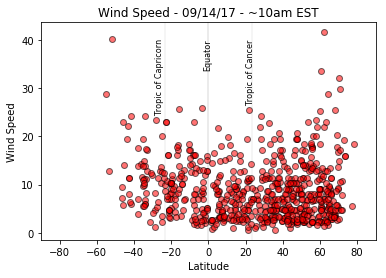

In [50]:
plt.scatter(df["latitude"], df["wind"], marker="o", facecolors="red", edgecolors="black",  alpha=0.55)
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.axvline(0, c="k", alpha=.1)
plt.axvline(23.5, c="k", alpha=.05)
plt.axvline(-23.5, c="k", alpha=.05)
plt.title("Wind Speed - 09/14/17 - ~10am EST")
plt.gcf().text(.50, .8, "Equator", fontsize=8, rotation="vertical")
plt.gcf().text(.39, .8, "Tropic of Capricorn", fontsize=8, rotation="vertical")
plt.gcf().text(.60, .8, "Tropic of Cancer", fontsize=8, rotation="vertical")
plt.show()

### Wind speed plotted against latitude and longitude

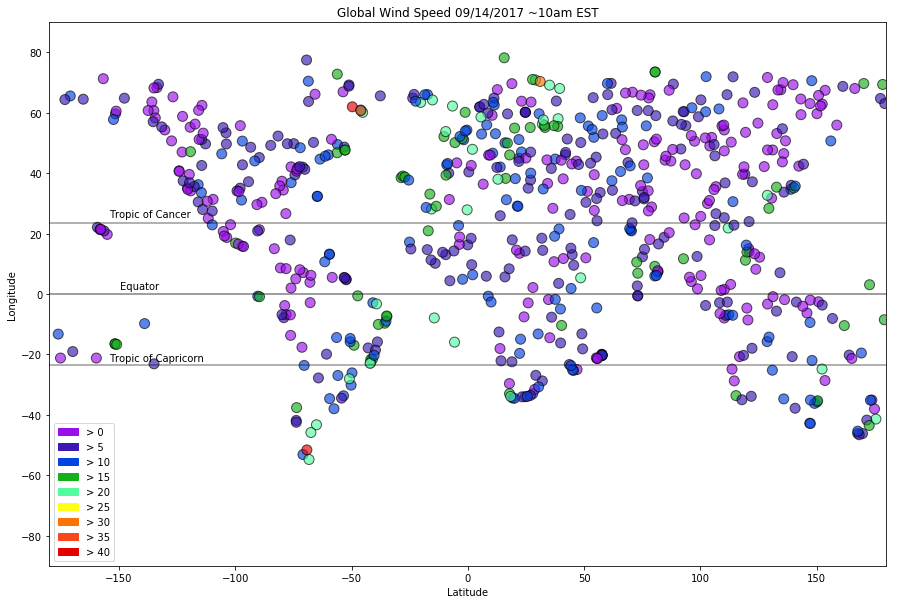

In [51]:
df['windColor'] = ""
df.loc[df['wind'] > 0, 'windColor'] = "xkcd:violet"
df.loc[df['wind'] > 5, 'windColor'] = "xkcd:indigo blue"
df.loc[df['wind'] > 10, 'windColor'] = "xkcd:blue"
df.loc[df['wind'] > 15, 'windColor'] = "xkcd:green"
df.loc[df['wind'] > 20, 'windColor'] = "xkcd:sea green"
df.loc[df['wind'] > 35, 'windColor'] = "xkcd:yellow"
df.loc[df['wind'] > 30, 'windColor'] = "xkcd:orange"
df.loc[df['wind'] > 35, 'windColor'] = "xkcd:reddish orange"
df.loc[df['wind'] > 40, 'windColor'] = "xkcd:red"

df.head()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df["longitude"], df["latitude"], color=df["windColor"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title("Global Wind Speed 09/14/2017 ~10am EST")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.gcf().text(.19,.51,"Equator", fontsize=10)
plt.gcf().text(.18,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.18,.41,"Tropic of Capricorn", fontsize=10)

windgreaterthan0 = mpatches.Patch(color='xkcd:violet', label='> 0')
windgreaterthan5 = mpatches.Patch(color='xkcd:indigo blue', label='> 5')
windgreaterthan10 = mpatches.Patch(color='xkcd:blue', label='> 10')
windgreaterthan15 = mpatches.Patch(color='xkcd:green', label='> 15')
windgreaterthan20 = mpatches.Patch(color='xkcd:sea green', label='> 20')
windgreaterthan25 = mpatches.Patch(color='xkcd:yellow', label='> 25')
windgreaterthan30 = mpatches.Patch(color='xkcd:orange', label='> 30')
windgreaterthan35 = mpatches.Patch(color='xkcd:reddish orange', label='> 35')
windgreaterthan40 = mpatches.Patch(color='xkcd:red', label='> 40')

plt.legend(handles=[windgreaterthan0, windgreaterthan5, windgreaterthan10, windgreaterthan15, windgreaterthan20, windgreaterthan25, windgreaterthan30, windgreaterthan35, windgreaterthan40], frameon=True, loc="lower left")


plt.show()